In [40]:
# imports
import pandas as pd

In [41]:
# load in data
df_1 = pd.read_csv('/Users/josephbell/Downloads/SPX_hr5aqh2 2/SPX_2000_2009.txt', sep=",", header=None,
                names=["DateTime", "Open", "High", "Low", "Close"])
print(df_1.shape)
df_1.head()

(266973, 5)


,DateTime,Open,High,Low,Close
0,2007-04-30 09:30:00,1494.07,1494.89,1494.07,1494.89
1,2007-04-30 09:31:00,1494.60,1494.60,1494.48,1494.48
2,2007-04-30 09:32:00,1494.49,1494.82,1494.49,1494.77
3,2007-04-30 09:33:00,1494.84,1495.32,1494.84,1495.29
4,2007-04-30 09:34:00,1495.36,1495.36,1494.98,1495.09


In [42]:
# load in data
df_2 = pd.read_csv('/Users/josephbell/Downloads/SPX_hr5aqh2 2/SPX_2010_2019.txt', sep=",", header=None,
                names=["DateTime", "Open", "High", "Low", "Close"])
print(df_2.shape)
df_2.head()

(992768, 5)


,DateTime,Open,High,Low,Close
0,2010-01-04 09:30:00,1116.56,1122.15,1116.56,1122.15
1,2010-01-04 09:31:00,1122.65,1123.80,1122.65,1123.80
2,2010-01-04 09:32:00,1123.96,1124.23,1123.95,1124.23
3,2010-01-04 09:33:00,1124.27,1124.27,1124.05,1124.23
4,2010-01-04 09:34:00,1124.17,1124.29,1124.17,1124.26


In [43]:
# load in data
df_3 = pd.read_csv('/Users/josephbell/Downloads/SPX_hr5aqh2 2/SPX_2020_2020.txt', sep=",", header=None,
                names=["DateTime", "Open", "High", "Low", "Close"])
print(df_3.shape)
df_3.head()

(90339, 5)


,DateTime,Open,High,Low,Close
0,2020-01-02 09:30:00,3244.67,3247.40,3244.67,3247.22
1,2020-01-02 09:31:00,3247.19,3247.22,3245.01,3245.22
2,2020-01-02 09:32:00,3245.07,3245.54,3244.16,3244.66
3,2020-01-02 09:33:00,3244.89,3247.69,3244.89,3247.61
4,2020-01-02 09:34:00,3247.38,3248.08,3246.92,3246.92


In [44]:
# concatenate dataframes
frames = [df_1, df_2, df_3]
df = pd.concat(frames)
print(df.shape)
df.head()

(1350080, 5)


,DateTime,Open,High,Low,Close
0,2007-04-30 09:30:00,1494.07,1494.89,1494.07,1494.89
1,2007-04-30 09:31:00,1494.60,1494.60,1494.48,1494.48
2,2007-04-30 09:32:00,1494.49,1494.82,1494.49,1494.77
3,2007-04-30 09:33:00,1494.84,1495.32,1494.84,1495.29
4,2007-04-30 09:34:00,1495.36,1495.36,1494.98,1495.09


In [45]:
# TODO - concatenate multiple txt files to include all data in the dataset - X
# separate out date and time or leave? - X
# look at price perecentage gain of each day from 3:30 pm to 3:40, 3:50, 4:00 pm 
# see if there is any pattern
# could compare it to other 30 minute intervals

In [46]:
# split date and time into two separate columns
df[['Date','Time']] = df.DateTime.str.split(" ",expand=True)
df = df[['Date', 'Time', 'Open', 'High', 'Low', 'Close']]
df.head()

,Date,Time,Open,High,Low,Close
0,2007-04-30,09:30:00,1494.07,1494.89,1494.07,1494.89
1,2007-04-30,09:31:00,1494.60,1494.60,1494.48,1494.48
2,2007-04-30,09:32:00,1494.49,1494.82,1494.49,1494.77
3,2007-04-30,09:33:00,1494.84,1495.32,1494.84,1495.29
4,2007-04-30,09:34:00,1495.36,1495.36,1494.98,1495.09


In [47]:
# convert datetime to pandas
df['Date'] = pd.to_datetime(df['Date'])

In [48]:
# look at 2015 onward or maybe August 2015 onward
df = df[df['Date'] > '2013-01-01']
df.head()

,Date,Time,Open,High,Low,Close
297938,2013-01-02,09:30:00,1426.19,1443.44,1426.19,1443.44
297939,2013-01-02,09:31:00,1443.71,1448.55,1443.71,1448.55
297940,2013-01-02,09:32:00,1448.93,1450.62,1448.83,1450.51
297941,2013-01-02,09:33:00,1450.63,1452.33,1450.26,1452.33
297942,2013-01-02,09:34:00,1452.36,1453.33,1452.36,1453.27


# 3:30 - 4:00

In [49]:
# for each day we need to take the 3:30 pm price / the 4:00 pm price
ramp = df[(df['Time'] == '15:30:00') | (df['Time'] == '16:00:00')]
print(ramp.shape)
ramp.tail()

(3944, 6)


,Date,Time,Open,High,Low,Close
89536,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90268,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90327,2020-09-11,16:00:00,3340.88,3340.90,3340.82,3340.90
90328,2020-09-11,16:00:00,3340.88,3340.90,3340.82,3340.90


In [50]:
# looks like there are some duplicates with same date and timestamp towards the end
ramp = ramp.drop_duplicates()
print(ramp.shape)
ramp.tail()

(3840, 6)


,Date,Time,Open,High,Low,Close
88743,2020-09-09,16:00:00,3398.36,3399.06,3398.36,3399.06
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90
89535,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90327,2020-09-11,16:00:00,3340.88,3340.90,3340.82,3340.90


In [51]:
# data does not include weekends and holidays...only trading days
# so we don't have to fix that like in other datasets!

In [52]:
# TODO - calculate the return from 3:30 pm to 4:00 pm each day
ramp['Time'].value_counts()
# looks like an odd number of times? should be even!

15:30:00    1920
16:00:00    1920
Name: Time, dtype: int64

In [53]:
# ramp = ramp.set_index('Date')
# ramp

In [54]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
298298,2013-01-02,15:30:00,1454.89,1454.97,1454.74,1454.97,NaN,NaN
298328,2013-01-02,16:00:00,1462.33,1462.39,1462.33,1462.39,1454.89,0.005114
298694,2013-01-03,15:30:00,1457.54,1457.64,1457.35,1457.35,1462.33,-0.003276
298724,2013-01-03,16:00:00,1459.21,1459.31,1459.21,1459.31,1457.54,0.001146
299090,2013-01-04,15:30:00,1467.76,1467.85,1467.49,1467.49,1459.21,0.005859
...,...,...,...,...,...,...,...,...
88743,2020-09-09,16:00:00,3398.36,3399.06,3398.36,3399.06,3422.37,-0.007016
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3398.36,-0.017058
89535,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95,3340.39,-0.000491
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3338.75,0.002510


In [55]:
# change format to % for readability
ramp['% Change'] = ramp['Percentage Change'].map(lambda x: "{0:.2f}%".format(x*100))
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change,% Change
298298,2013-01-02,15:30:00,1454.89,1454.97,1454.74,1454.97,NaN,NaN,nan%
298328,2013-01-02,16:00:00,1462.33,1462.39,1462.33,1462.39,1454.89,0.005114,0.51%
298694,2013-01-03,15:30:00,1457.54,1457.64,1457.35,1457.35,1462.33,-0.003276,-0.33%
298724,2013-01-03,16:00:00,1459.21,1459.31,1459.21,1459.31,1457.54,0.001146,0.11%
299090,2013-01-04,15:30:00,1467.76,1467.85,1467.49,1467.49,1459.21,0.005859,0.59%
...,...,...,...,...,...,...,...,...,...
88743,2020-09-09,16:00:00,3398.36,3399.06,3398.36,3399.06,3422.37,-0.007016,-0.70%
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3398.36,-0.017058,-1.71%
89535,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95,3340.39,-0.000491,-0.05%
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3338.75,0.002510,0.25%


In [56]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

In [57]:
# look at end of day rows only to get percentage change for the last half hour
ramp = ramp[(ramp['Time'] == '16:00:00')] #& (ramp['Date'] > '2016-01-01')]
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change,% Change,Price Direction
298328,2013-01-02,16:00:00,1462.33,1462.39,1462.33,1462.39,1454.89,0.005114,0.51%,1
298724,2013-01-03,16:00:00,1459.21,1459.31,1459.21,1459.31,1457.54,0.001146,0.11%,1
299120,2013-01-04,16:00:00,1466.15,1466.32,1466.15,1466.32,1467.76,-0.001097,-0.11%,0
299516,2013-01-07,16:00:00,1461.73,1461.85,1461.73,1461.85,1462.41,-0.000465,-0.05%,0
299912,2013-01-08,16:00:00,1457.07,1457.15,1457.07,1457.14,1457.35,-0.000192,-0.02%,0
...,...,...,...,...,...,...,...,...,...,...
87159,2020-09-04,16:00:00,3426.38,3426.86,3426.38,3426.86,3451.01,-0.007137,-0.71%,0
87951,2020-09-08,16:00:00,3332.09,3332.09,3331.85,3331.85,3350.20,-0.005406,-0.54%,0
88743,2020-09-09,16:00:00,3398.36,3399.06,3398.36,3399.06,3422.37,-0.007016,-0.70%,0
89535,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95,3340.39,-0.000491,-0.05%,0


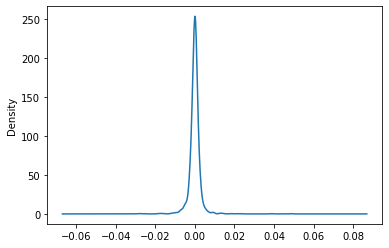

In [58]:
ax = ramp['Percentage Change'].plot.kde()

In [59]:
ramp['Percentage Change'].describe()

count    1920.000000
mean       -0.000020
std         0.003123
min        -0.028442
25%        -0.000927
50%         0.000052
75%         0.000925
max         0.048432
Name: Percentage Change, dtype: float64

In [60]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.515625
0    0.484375
Name: Price Direction, dtype: float64

In [61]:
# TODO - look at 3:30 - 3:40, 3:30 - 3:50 etc
# add features like market performance and market up or down day

# 3:30 to 3:40

In [62]:
# for each day we need to take the 3:30 pm price / the 3:40 pm price
ramp = df[(df['Time'] == '15:30:00') | (df['Time'] == '15:40:00')]
print(ramp.shape)
ramp.tail()

(3944, 6)


,Date,Time,Open,High,Low,Close
89496,2020-09-10,15:40:00,3344.45,3347.22,3342.99,3347.19
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90268,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90287,2020-09-11,15:40:00,3342.47,3345.44,3342.34,3343.71
90288,2020-09-11,15:40:00,3342.47,3345.44,3342.34,3343.71


In [63]:
# looks like there are some duplicates with same date and timestamp towards the end
ramp = ramp.drop_duplicates()
print(ramp.shape)
ramp.head()

(3840, 6)


,Date,Time,Open,High,Low,Close
298298,2013-01-02,15:30:00,1454.89,1454.97,1454.74,1454.97
298308,2013-01-02,15:40:00,1456.42,1456.72,1456.42,1456.72
298694,2013-01-03,15:30:00,1457.54,1457.64,1457.35,1457.35
298704,2013-01-03,15:40:00,1456.68,1457.01,1456.68,1457.01
299090,2013-01-04,15:30:00,1467.76,1467.85,1467.49,1467.49


In [64]:
ramp['Time'].value_counts()

15:30:00    1920
15:40:00    1920
Name: Time, dtype: int64

In [65]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
298298,2013-01-02,15:30:00,1454.89,1454.97,1454.74,1454.97,NaN,NaN
298308,2013-01-02,15:40:00,1456.42,1456.72,1456.42,1456.72,1454.89,0.001052
298694,2013-01-03,15:30:00,1457.54,1457.64,1457.35,1457.35,1456.42,0.000769
298704,2013-01-03,15:40:00,1456.68,1457.01,1456.68,1457.01,1457.54,-0.000590
299090,2013-01-04,15:30:00,1467.76,1467.85,1467.49,1467.49,1456.68,0.007606
...,...,...,...,...,...,...,...,...
88703,2020-09-09,15:40:00,3411.73,3414.10,3411.67,3413.39,3422.37,-0.003109
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3411.73,-0.020910
89495,2020-09-10,15:40:00,3344.45,3347.22,3342.99,3347.19,3340.39,0.001215
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3344.45,0.000801


In [66]:
# change format to % for readability
ramp['% Change'] = ramp['Percentage Change'].map(lambda x: "{0:.2f}%".format(x*100))
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change,% Change
298298,2013-01-02,15:30:00,1454.89,1454.97,1454.74,1454.97,NaN,NaN,nan%
298308,2013-01-02,15:40:00,1456.42,1456.72,1456.42,1456.72,1454.89,0.001052,0.11%
298694,2013-01-03,15:30:00,1457.54,1457.64,1457.35,1457.35,1456.42,0.000769,0.08%
298704,2013-01-03,15:40:00,1456.68,1457.01,1456.68,1457.01,1457.54,-0.000590,-0.06%
299090,2013-01-04,15:30:00,1467.76,1467.85,1467.49,1467.49,1456.68,0.007606,0.76%
...,...,...,...,...,...,...,...,...,...
88703,2020-09-09,15:40:00,3411.73,3414.10,3411.67,3413.39,3422.37,-0.003109,-0.31%
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3411.73,-0.020910,-2.09%
89495,2020-09-10,15:40:00,3344.45,3347.22,3342.99,3347.19,3340.39,0.001215,0.12%
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3344.45,0.000801,0.08%


In [67]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

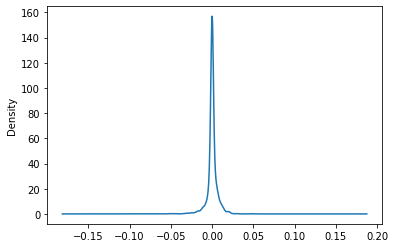

In [68]:
ax = ramp['Percentage Change'].plot.kde()

In [69]:
ramp['Percentage Change'].describe()

count    3839.000000
mean        0.000242
std         0.007029
min        -0.089139
25%        -0.000939
50%         0.000154
75%         0.001537
max         0.095229
Name: Percentage Change, dtype: float64

In [70]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.551302
0    0.448698
Name: Price Direction, dtype: float64

# 3:30 to 3:50

In [71]:
# for each day we need to take the 3:30 pm price / the 3:40 pm price
ramp = df[(df['Time'] == '15:30:00') | (df['Time'] == '15:50:00')]
print(ramp.shape)
ramp.tail()

(3944, 6)


,Date,Time,Open,High,Low,Close
89516,2020-09-10,15:50:00,3339.36,3343.88,3336.51,3343.68
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90268,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90307,2020-09-11,15:50:00,3343.65,3345.35,3340.03,3344.19
90308,2020-09-11,15:50:00,3343.65,3345.35,3340.03,3344.19


In [72]:
# looks like there are some duplicates with same date and timestamp towards the end
ramp = ramp.drop_duplicates()
print(ramp.shape)
ramp.head()

(3840, 6)


,Date,Time,Open,High,Low,Close
298298,2013-01-02,15:30:00,1454.89,1454.97,1454.74,1454.97
298318,2013-01-02,15:50:00,1455.71,1456.38,1455.71,1456.35
298694,2013-01-03,15:30:00,1457.54,1457.64,1457.35,1457.35
298714,2013-01-03,15:50:00,1458.62,1458.91,1458.59,1458.91
299090,2013-01-04,15:30:00,1467.76,1467.85,1467.49,1467.49


In [73]:
ramp['Time'].value_counts()

15:50:00    1920
15:30:00    1920
Name: Time, dtype: int64

In [74]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
298298,2013-01-02,15:30:00,1454.89,1454.97,1454.74,1454.97,NaN,NaN
298318,2013-01-02,15:50:00,1455.71,1456.38,1455.71,1456.35,1454.89,0.000564
298694,2013-01-03,15:30:00,1457.54,1457.64,1457.35,1457.35,1455.71,0.001257
298714,2013-01-03,15:50:00,1458.62,1458.91,1458.59,1458.91,1457.54,0.000741
299090,2013-01-04,15:30:00,1467.76,1467.85,1467.49,1467.49,1458.62,0.006266
...,...,...,...,...,...,...,...,...
88723,2020-09-09,15:50:00,3408.21,3408.21,3403.26,3405.28,3422.37,-0.004137
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3408.21,-0.019899
89515,2020-09-10,15:50:00,3339.36,3343.88,3336.51,3343.68,3340.39,-0.000308
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3339.36,0.002327


In [75]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

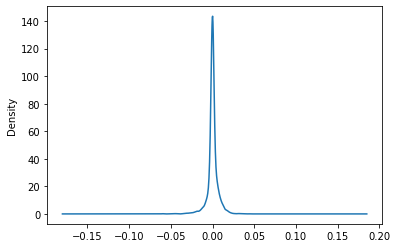

In [76]:
ax = ramp['Percentage Change'].plot.kde()
ax

In [77]:
ramp['Percentage Change'].describe()

count    3839.000000
mean        0.000242
std         0.007087
min        -0.088719
25%        -0.001201
50%         0.000134
75%         0.001882
max         0.093731
Name: Percentage Change, dtype: float64

In [78]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.533854
0    0.466146
Name: Price Direction, dtype: float64